In [13]:
%load_ext autoreload
%autoreload 2

import os
import sys
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('../../src')

from paths import ROOT_DIR, FLLD_DB_DIR
IMG_PATH = ROOT_DIR+'/img/energy_and_discomfort'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

from utils.functions import load_datasets_from_csv
from di.plot import plot_di_pwr_in_interval, plot_di_cons2, plot_di_cons
from di.functions import append_di_category, get_cons_by_di_class

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
'''sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context(rc={"font.size":11,"axes.titlesize":14,"axes.labelsize":12})'''
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica', "axes.facecolor": "w"})
sns.set_context(rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})

In [15]:
dts = load_datasets_from_csv(FLLD_DB_DIR).copy()

In [16]:
for key in dts:
    append_di_category(dts[key])
    print(key)

air
computer
external
fan
fridge
house
pump


In [17]:
cons = get_cons_by_di_class(dts['fan'])

In [18]:
cons

(23.094732946666667,
 5.402455566666666,
 14.095766416666667,
 1.7582942266666666,
 1.8382167366666666)

In [19]:
for key in dts:
    try:
        print("\n{}\n".format(key))
        cons = get_cons_by_di_class(dts[key])
        print("Total                 :{:.2f} kWh".format(cons[0]))
        print("Comfortable           :{:.2f} kWh    %{:.2f}".format(cons[1], cons[1]/cons[0]*100))
        print("Partially Comfortable :{:.2f} kWh    %{:.2f}".format(cons[2], cons[2]/cons[0]*100))
        print("Uncomfortable         :{:.2f} kWh    %{:.2f}".format(cons[3], cons[3]/cons[0]*100))
        print("Very uncomfortable    :{:.2f} kWh    %{:.2f}".format(cons[4], cons[4]/cons[0]*100))
    except Exception as e:
        print(e)

    

    


air

Total                 :91.45 kWh
Comfortable           :78.79 kWh    %86.16
Partially Comfortable :10.13 kWh    %11.07
Uncomfortable         :2.42 kWh    %2.65
Very uncomfortable    :0.11 kWh    %0.12

computer

Total                 :20.44 kWh
Comfortable           :1.05 kWh    %5.14
Partially Comfortable :10.53 kWh    %51.50
Uncomfortable         :4.69 kWh    %22.96
Very uncomfortable    :4.17 kWh    %20.40

external

'Pwr'

fan

Total                 :23.09 kWh
Comfortable           :5.40 kWh    %23.39
Partially Comfortable :14.10 kWh    %61.03
Uncomfortable         :1.76 kWh    %7.61
Very uncomfortable    :1.84 kWh    %7.96

fridge

Total                 :74.41 kWh
Comfortable           :3.48 kWh    %4.68
Partially Comfortable :37.27 kWh    %50.09
Uncomfortable         :26.45 kWh    %35.54
Very uncomfortable    :7.21 kWh    %9.69

house

Total                 :328.67 kWh
Comfortable           :31.48 kWh    %9.58
Partially Comfortable :164.50 kWh    %50.05
Uncomfortable       

In [20]:
intervals = [("2021-02-23 20:44:00","2021-02-24 02:20:00"),  #excesso
             ("2021-02-27 17:34:00","2021-02-28 04:14:00"),  #economia
             ("2021-03-01 22:00:00", "2021-03-02  16:00:00"),
             ("2021-03-04 22:00:00", "2021-03-05  16:00:00"),
             ("2021-03-14 17:08:00","2021-03-15 02:34:00"),  # excesso
             ("2021-03-04 20:00:00", "2021-03-05 02:10:00"), # excesso
             ("2021-03-02 21:00:00","2021-03-03 00:36:00"), # excesso
             ("2021-03-15 18:08:00", "2021-03-16 00:56:00"),   #teste
             ("2021-02-25 21:00:00", "2021-02-26 06:00:00")]

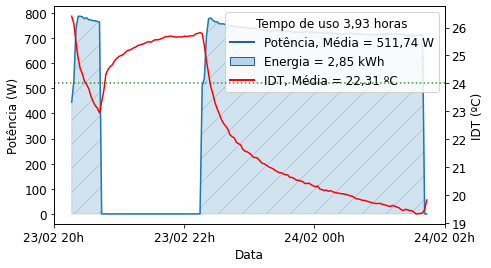

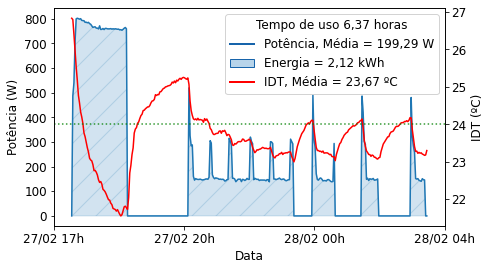

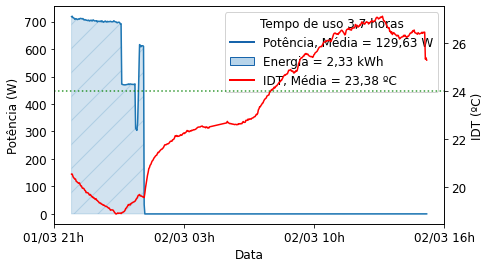

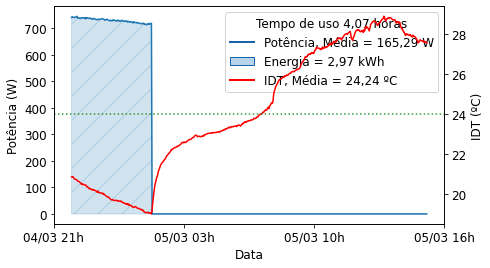

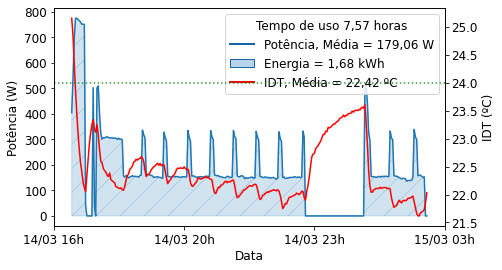

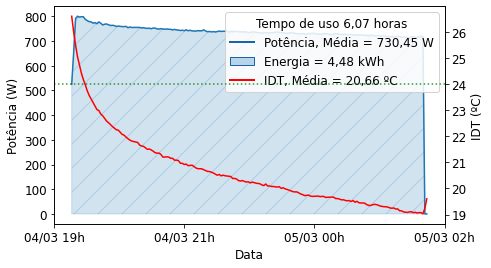

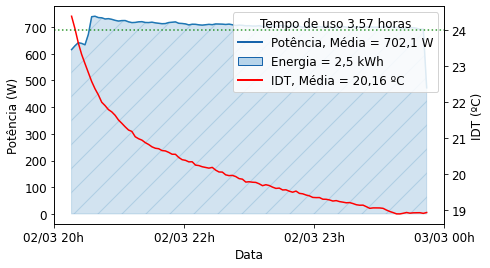

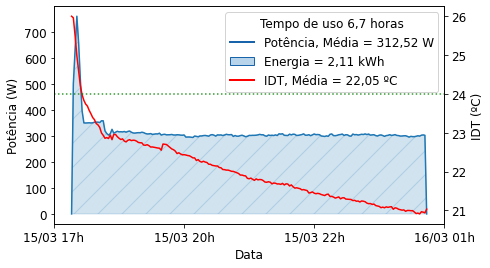

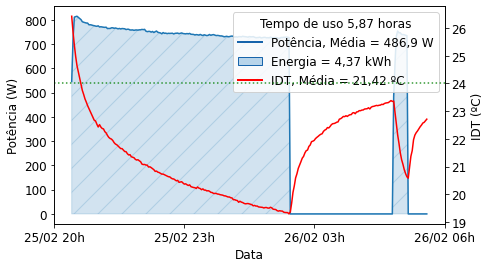

In [21]:
for i in range(len(intervals)):
    plot_di_pwr_in_interval(dts['air'], intervals[i][0], intervals[i][1])
    path = IMG_PATH+"/air_program{}.svg".format(i)
    plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
    path = IMG_PATH+"/air_program{}.jpeg".format(i)
    plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')

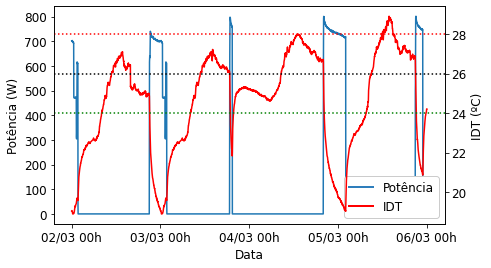

In [22]:
start = "2021-03-02 00:00:00"
stop  ="2021-03-06 00:00:00"

plot_di_cons(dts['air'], start, stop)

path = IMG_PATH+"/air_pwr_and_di{}.svg".format(i)
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
path = IMG_PATH+"/air_pwr_and_di{}.jpeg".format(i)
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')

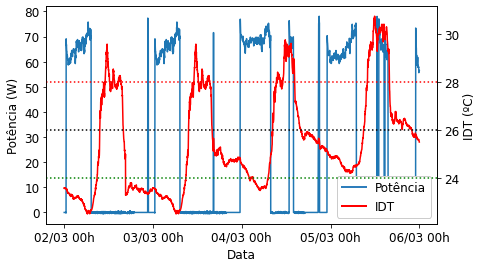

In [23]:
start = "2021-03-02 00:00:00"
stop  ="2021-03-06 00:00:00"

plot_di_cons(dts['fan'], start, stop)

path = IMG_PATH+"/fan_pwr_and_di{}.svg".format(i)
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
path = IMG_PATH+"/fan_pwr_and_di{}.jpeg".format(i)
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')